In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys

sys.path.append('/content/drive/MyDrive/colab')

In [ ]:
import cv2
from Set import DisjointSet
import matplotlib.pyplot as plt
import google.colab.patches as colab
import numpy as np

In [ ]:
  # init the tiny image
  tiny_image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 255, 255, 255, 0, 255, 255, 255, 0],
                            [0, 0, 255, 0, 0, 0, 0, 255, 0],
                            [0, 0, 255, 0, 0, 255, 255, 255, 0],
                            [0, 0, 255, 0, 0, 0, 0, 255, 0],
                            [0, 255, 255, 255, 0, 255, 255, 255, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=np.int32)

Pass 1: (1) assign a temporal label, (2)record label equivalence

In [ ]:
label_image =np.zeros_like(tiny_image)

new_label =1
equivList =list()
for row in range(1,tiny_image.shape[0]):
  for col in range(1,tiny_image.shape[1]):
    if (tiny_image[row,col] !=0):
      # (1) assign a temporal label

      # using this list can store plenty of neighbors,
      # no worry to dealing lots of if-else statement
      adjacent_label =list()    
      if (tiny_image[row-1,col]!= 0):
        adjacent_label.append(label_image[row-1,col])
      if (tiny_image[row,col-1]!= 0):
        adjacent_label.append(label_image[row,col-1])

      if len(adjacent_label)==0:
        label_image[row,col] =new_label
        new_label +=1
      else:
        label_image[row,col] =min(adjacent_label)
        if (len(adjacent_label) >=2):
          equivList.append(adjacent_label)

# label_image
equivList

[[2, 3], [1, 4], [2, 5]]

Pass2: (1) resolve label equivalence,  (2)replace temporal labels

In [ ]:
# resolve label equivalence
disjointSet =DisjointSet()
# using 
disjointSet.makeSet(new_label)

In [ ]:
for i in range(len(equivList)):
  print(equivList[i][0])  
  print(equivList[i][1])  
  disjointSet.union(x=equivList[i][0],y=equivList[i][1])

2
3
1
4
2
5


In [ ]:
label_image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 2, 2, 2, 0],
       [0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 0, 1, 0, 0, 3, 3, 2, 0],
       [0, 0, 1, 0, 0, 0, 0, 2, 0],
       [0, 4, 1, 1, 0, 5, 5, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [ ]:
labelCount =0

for row in range(1,tiny_image.shape[0]):
  for col in range(1,tiny_image.shape[1]):
    if (tiny_image[row,col] !=0):
      
      # get temporal label
      temporal_label =label_image[row,col]
      
      # find minimum label
      minValue =disjointSet.find(temporal_label)

      # replace the label
      label_image[row,col] =minValue

      # count the label
      labelCount +=1

In [ ]:
# color output image

outImage =np.zeros_like(label_image,dtype=np.uint8)
gValueStep =np.round(255/labelCount)
scanedLabel =dict()

def dictSearch(aDict,key):
  for k in aDict.keys():
    if (k ==key): return True
  return False

for row in range(label_image.shape[0]):
  for col in range(label_image.shape[1]):
    if (label_image[row,col] !=0):
      if (not dictSearch(scanedLabel,label_image[row,col])):
        #  split 0..255 into half
        # if current label is odd, pick the gray value on left half,
        # if current label is even, pick the gray value on right half,
        # 2 is saperation factor, let differnces to be more clear
        lr =1 if (label_image[row,col]%2 ==0) else -1
        scanedLabel[label_image[row,col]] = np.round((255/2)+(gValueStep *label_image[row,col]*lr*(2)))
      outImage[row,col] =scanedLabel[label_image[row,col]]
    else:
      outImage[row,col] =0

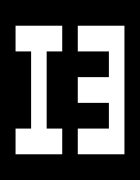

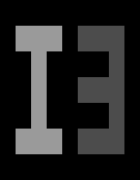

In [ ]:
inImage =np.zeros_like(tiny_image,dtype=np.uint8)
inImage =tiny_image.astype(np.uint8)
dsize =(inImage.shape[0]*20,inImage.shape[1]*20)
resizedInImage =cv2.resize(inImage,dsize,interpolation = cv2.INTER_AREA)
resizedOutImage =cv2.resize(outImage,dsize,interpolation = cv2.INTER_AREA)

colab.cv2_imshow(resizedInImage)
colab.cv2_imshow(resizedOutImage)

In [ ]:
d ={'a':1,'b':2}

print(type(d.values))

for i in d.values():
  print(i)

<class 'builtin_function_or_method'>
1
2


In [7]:
import numpy as np
a =np.array([
             [
              [1],
              [2]
              ]
             ,[[1],[2]]])
a.shape

(2, 2, 1)